## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue May  7 20:29:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

**Below code snippet is to download the dataset directly on colab environment from Roboflow**

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zwhPpxYVrgIjnAzgqCLQ")
project = rf.workspace("cc-pintel").project("car-counting")
version = project.version(1)
dataset = version.download("yolov8")


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Counting-1 in yolov8:: 100%|██████████| 14578/14578 [00:02<00:00, 5650.24it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 283MB/s]
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Car-Counting-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1714135961.c45d046c5592.3375.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


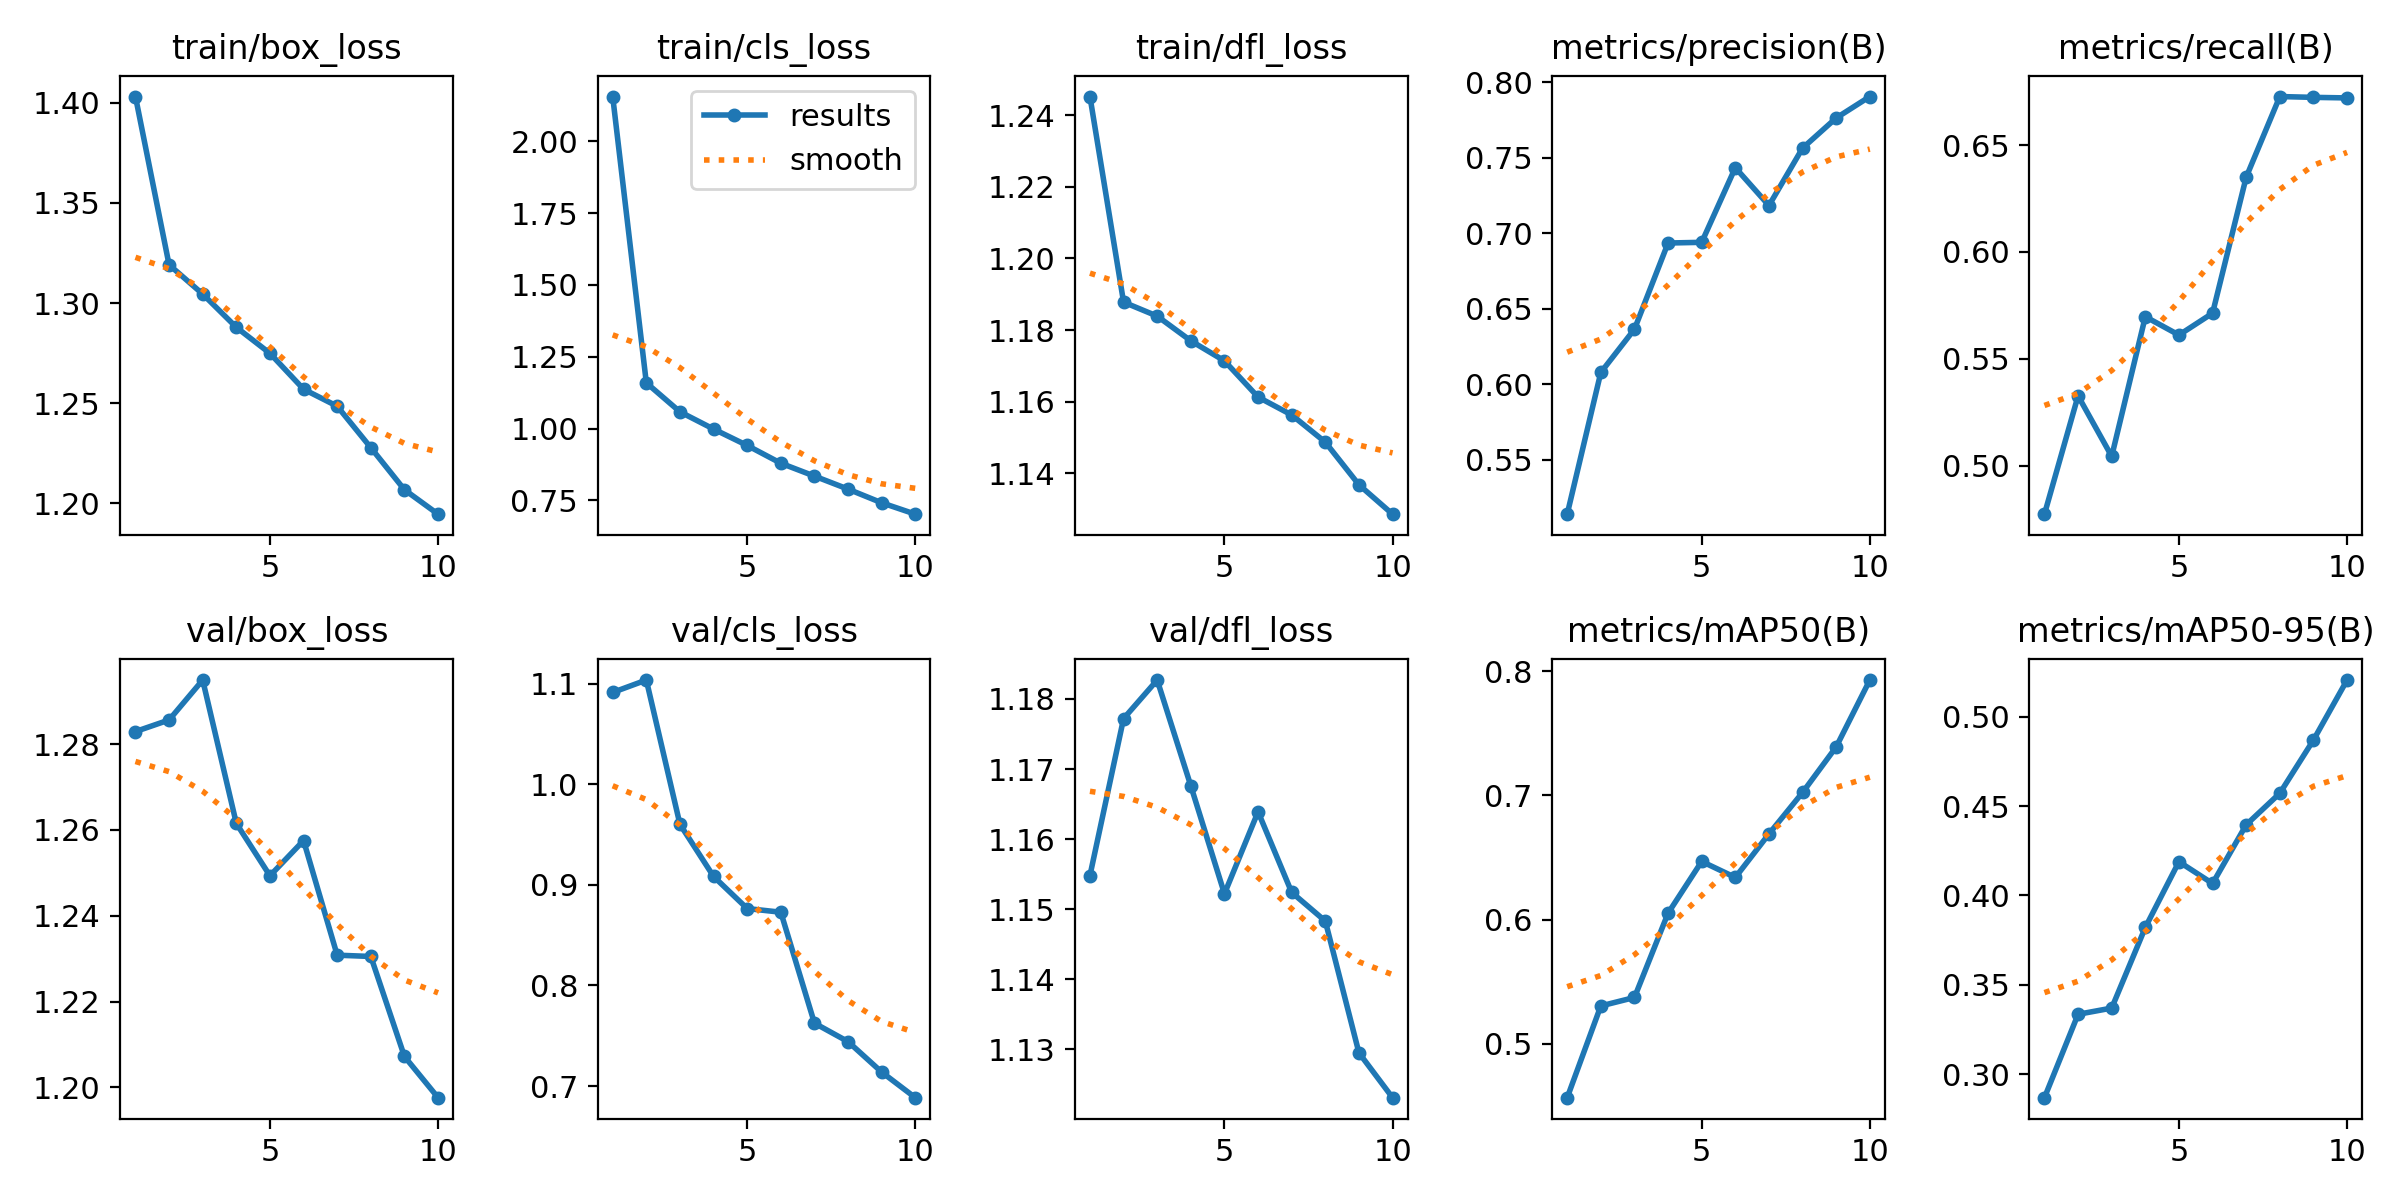

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


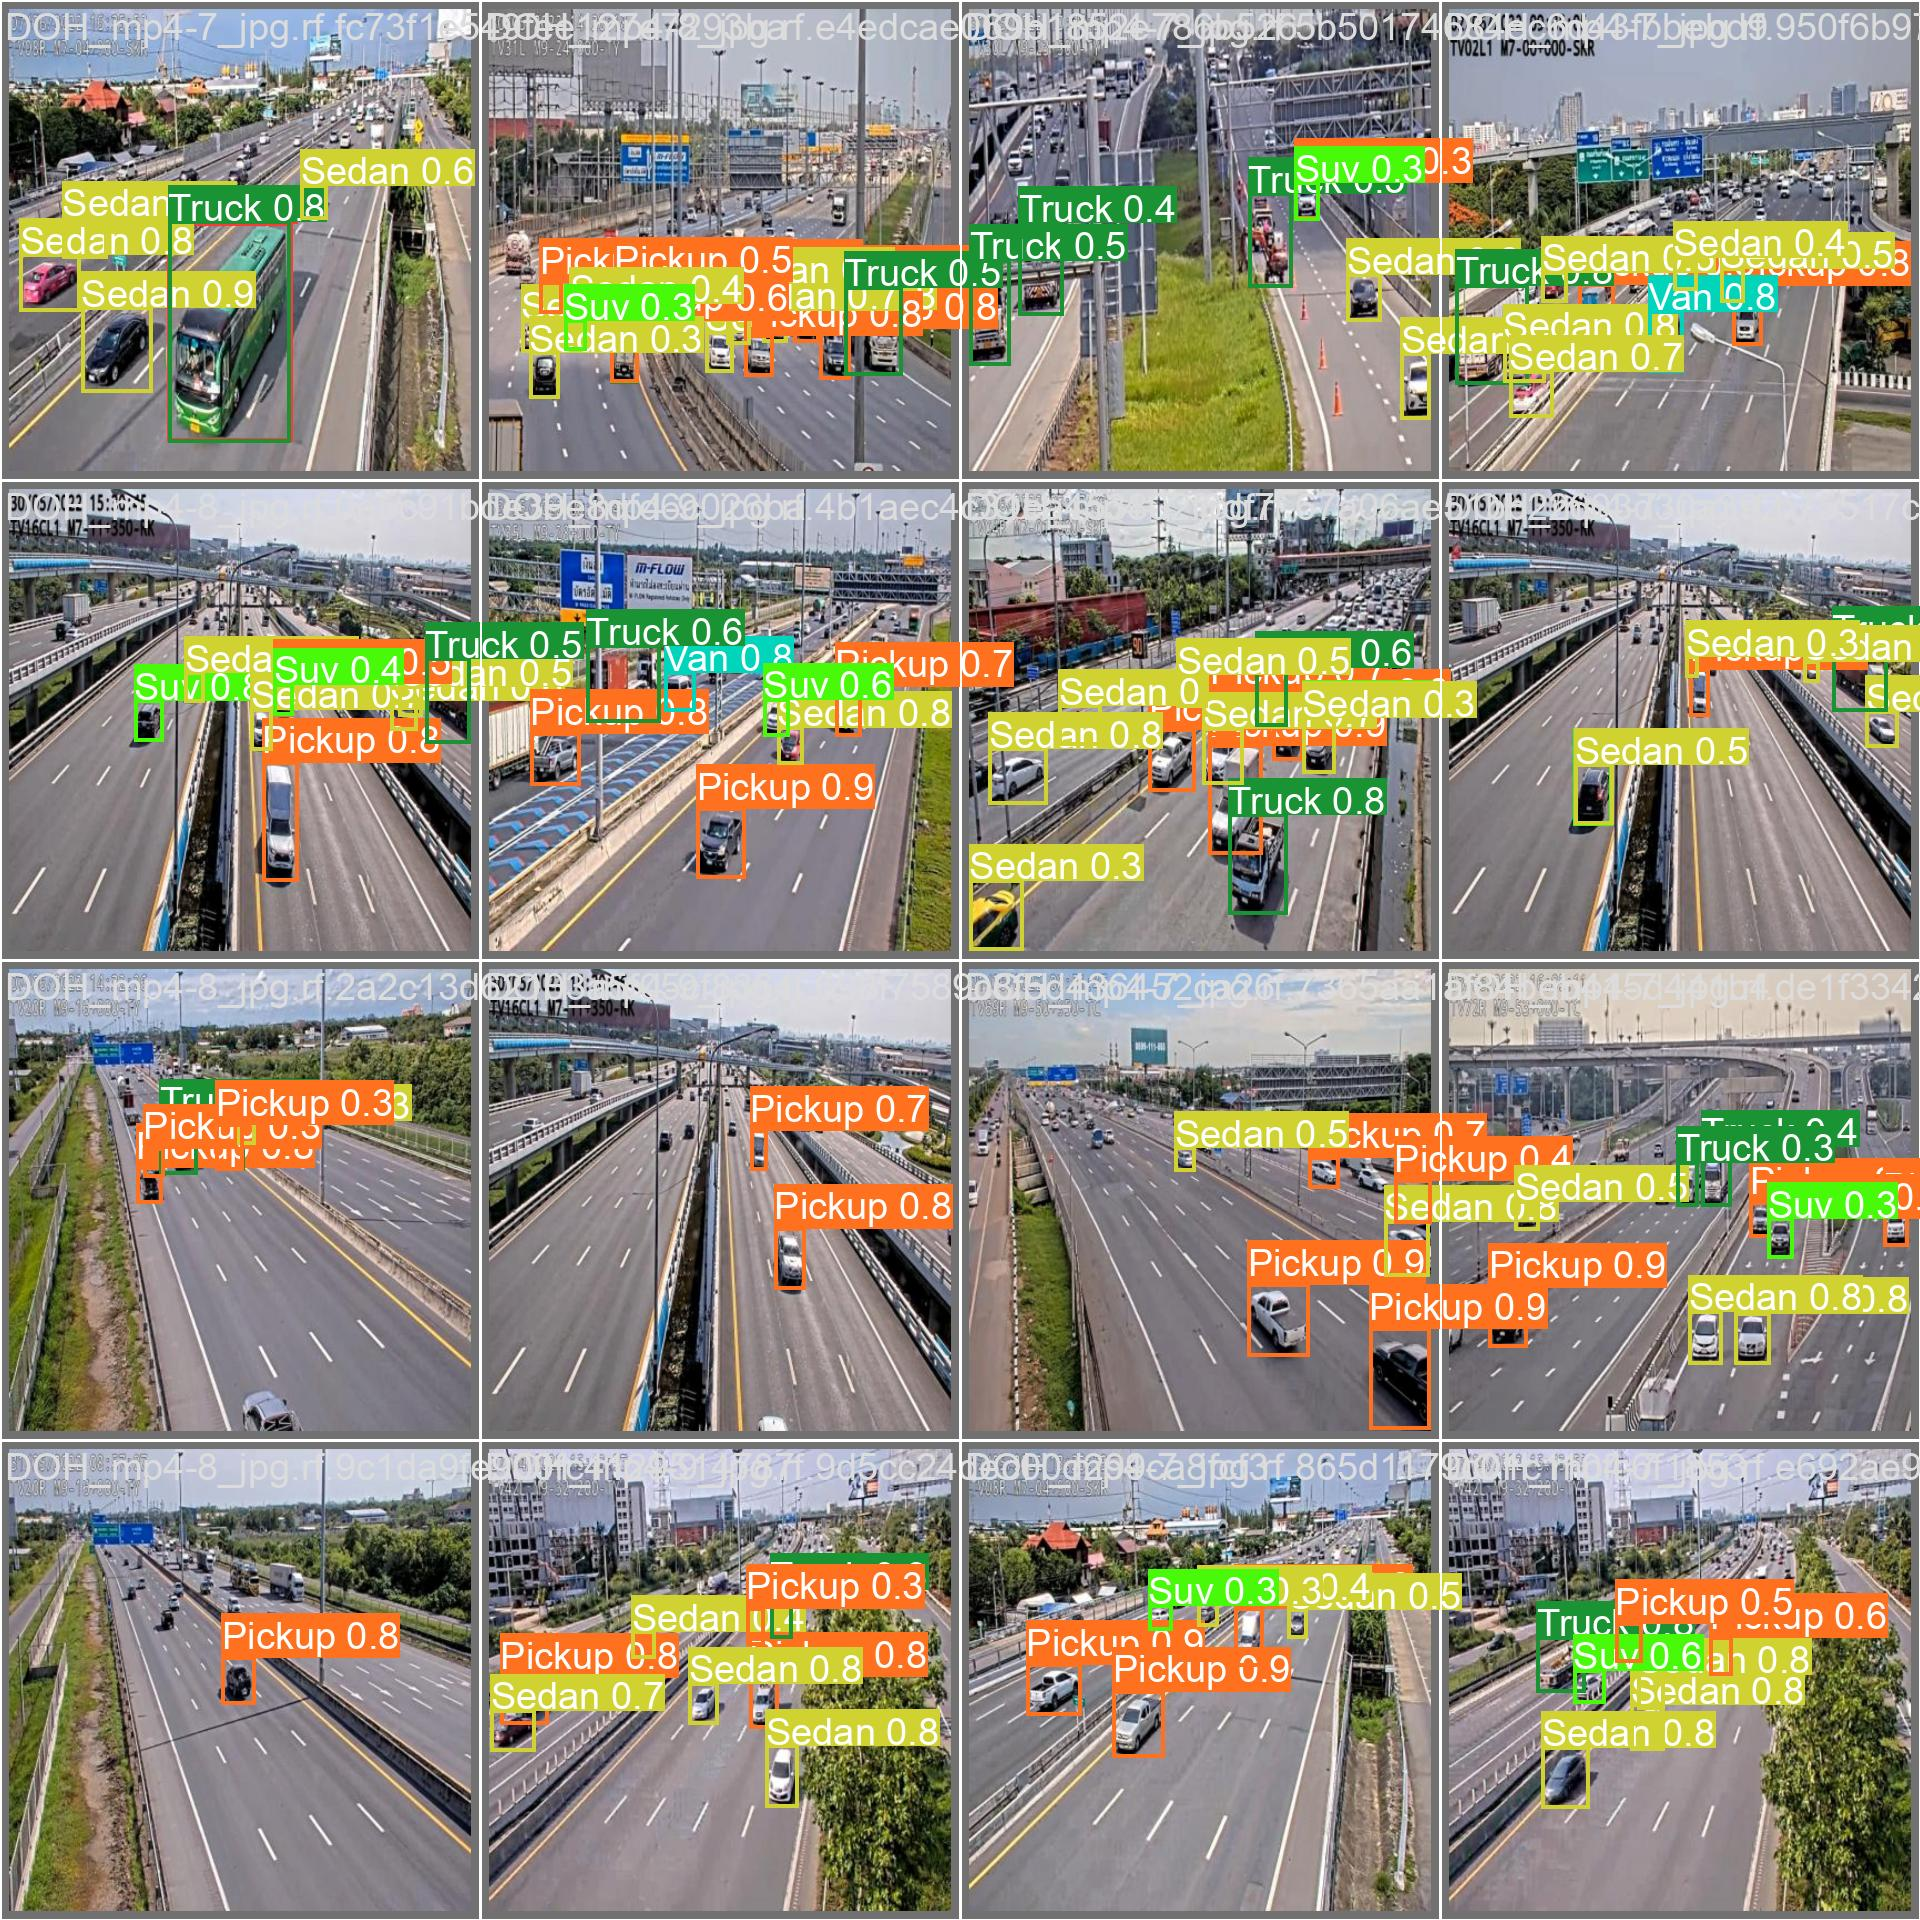

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Car-Counting-1/valid/labels.cache... 1456 images, 0 backgrounds, 0 corrupt: 100% 1456/1456 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 8572. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 91/91 [00:32<00:00,  2.80it/s]
                   all       1456       8572       0.

/content


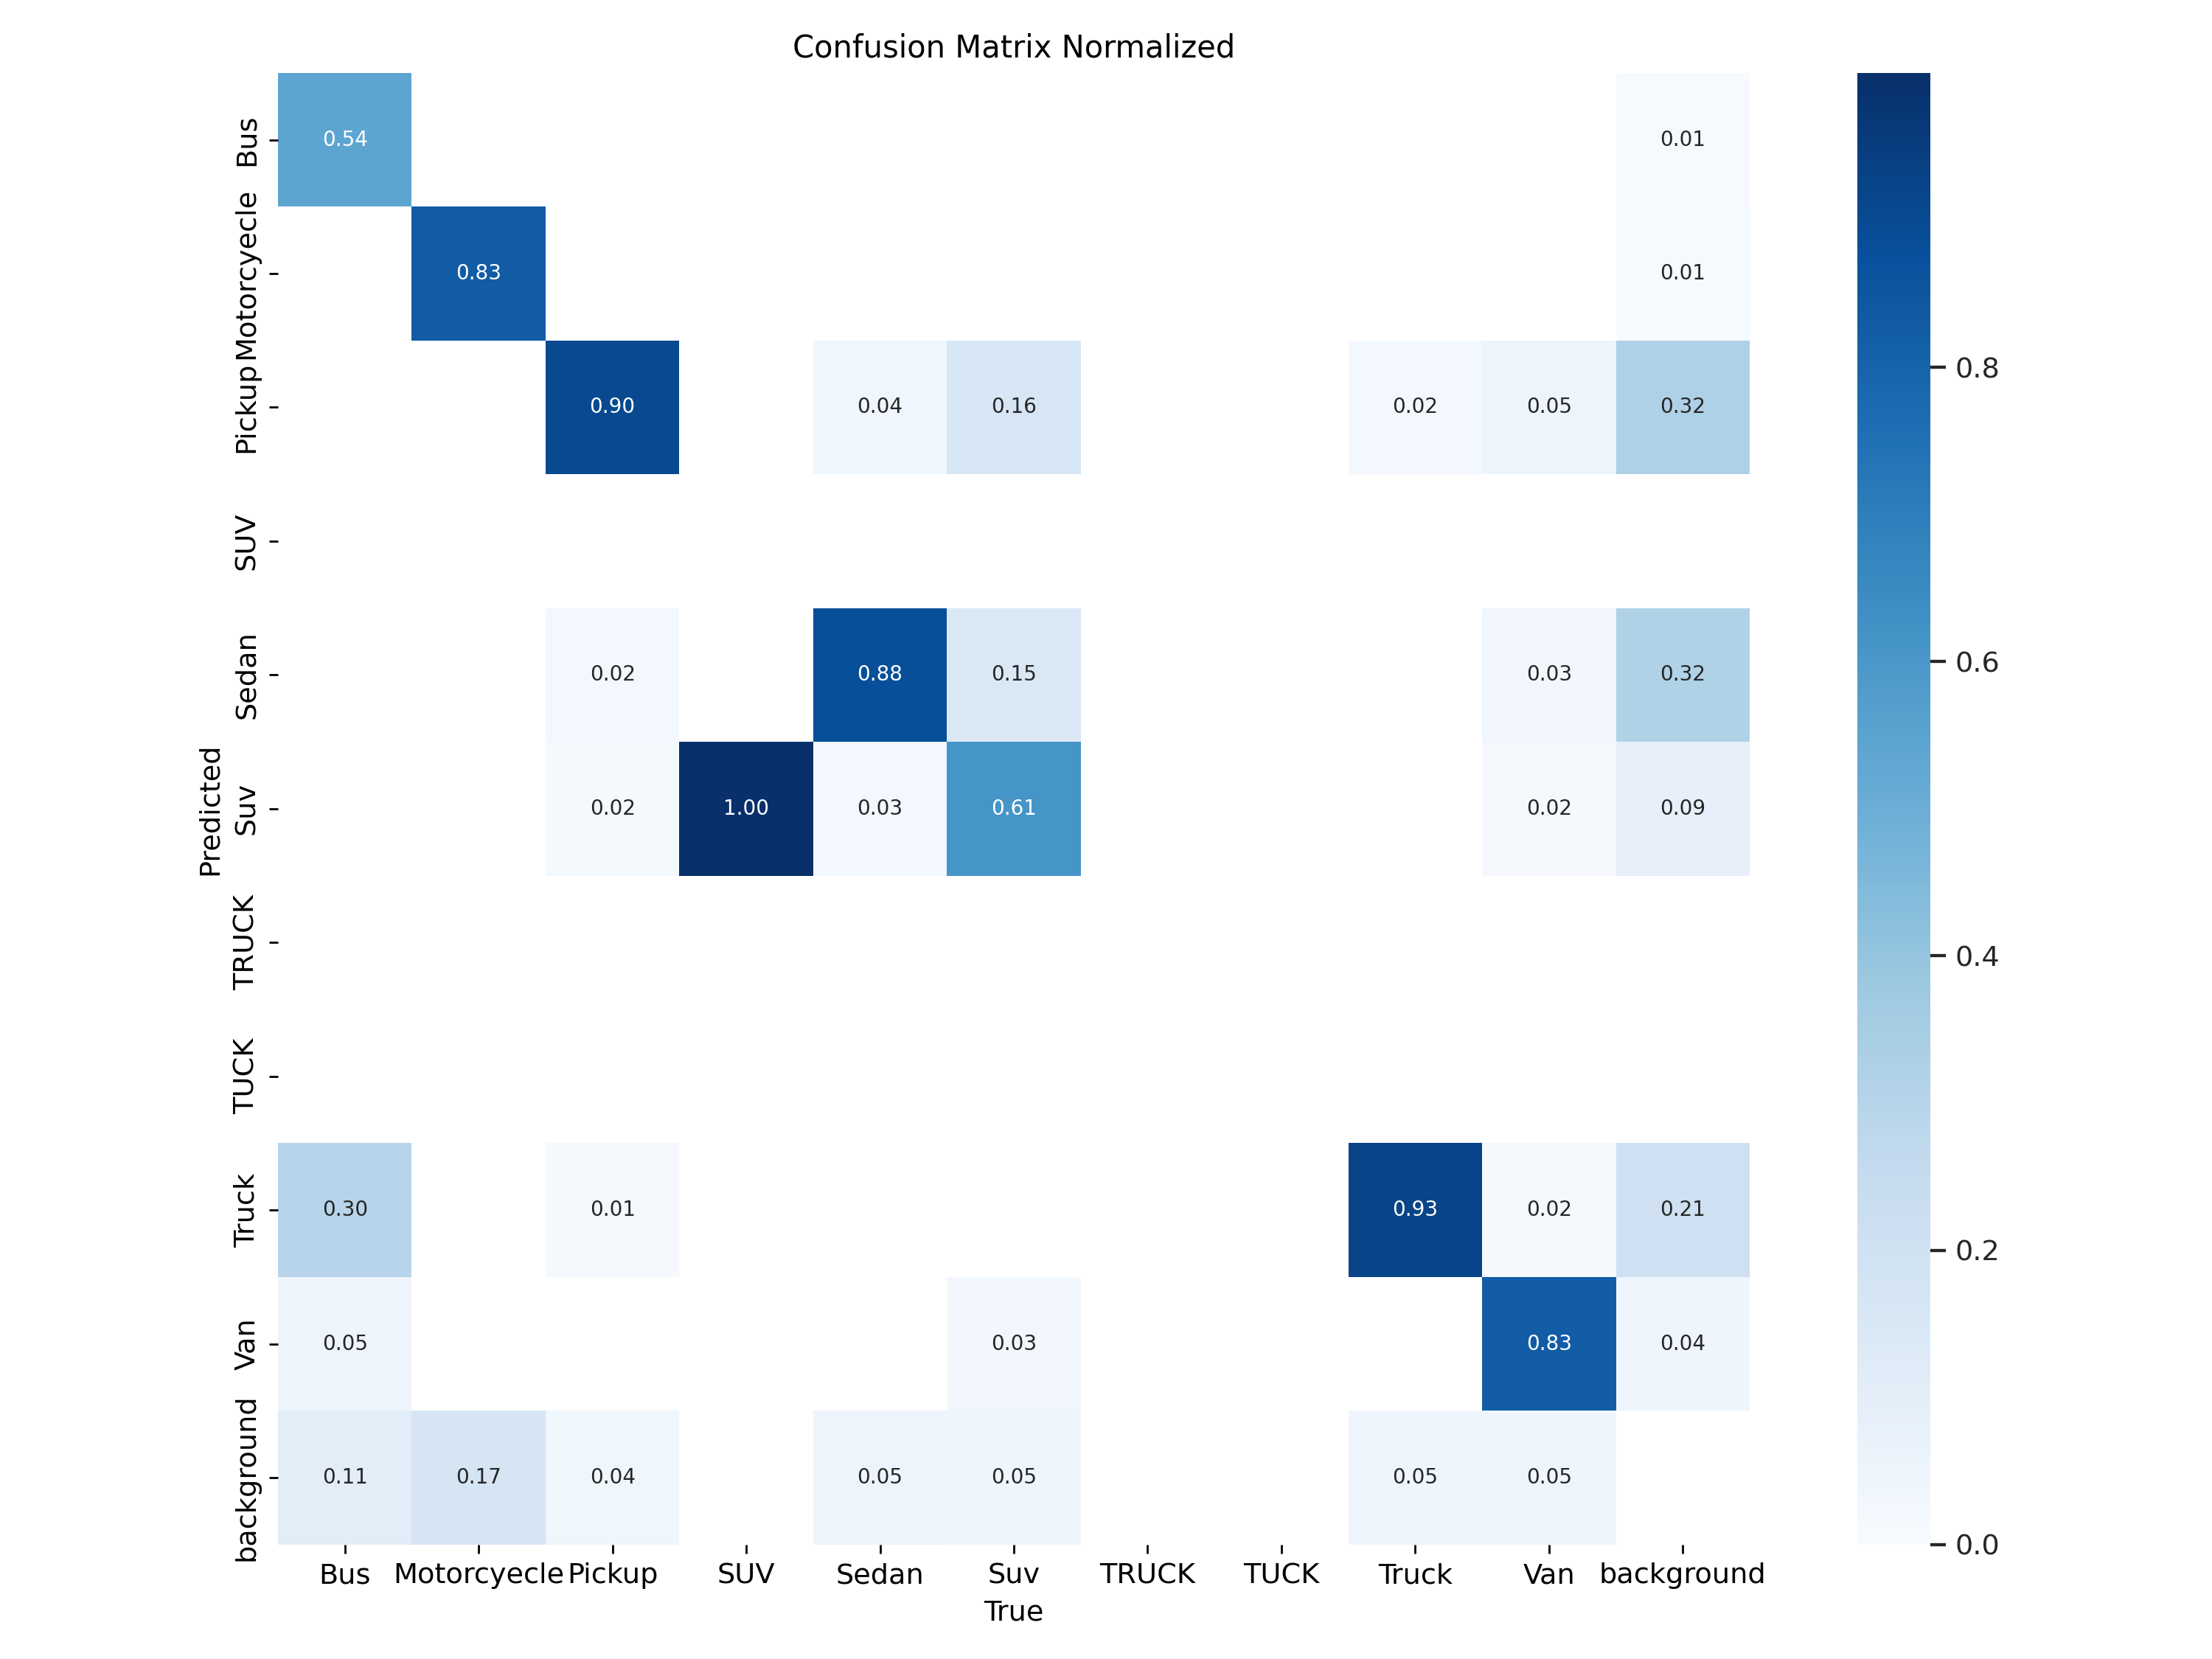

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png', width=600)

/content


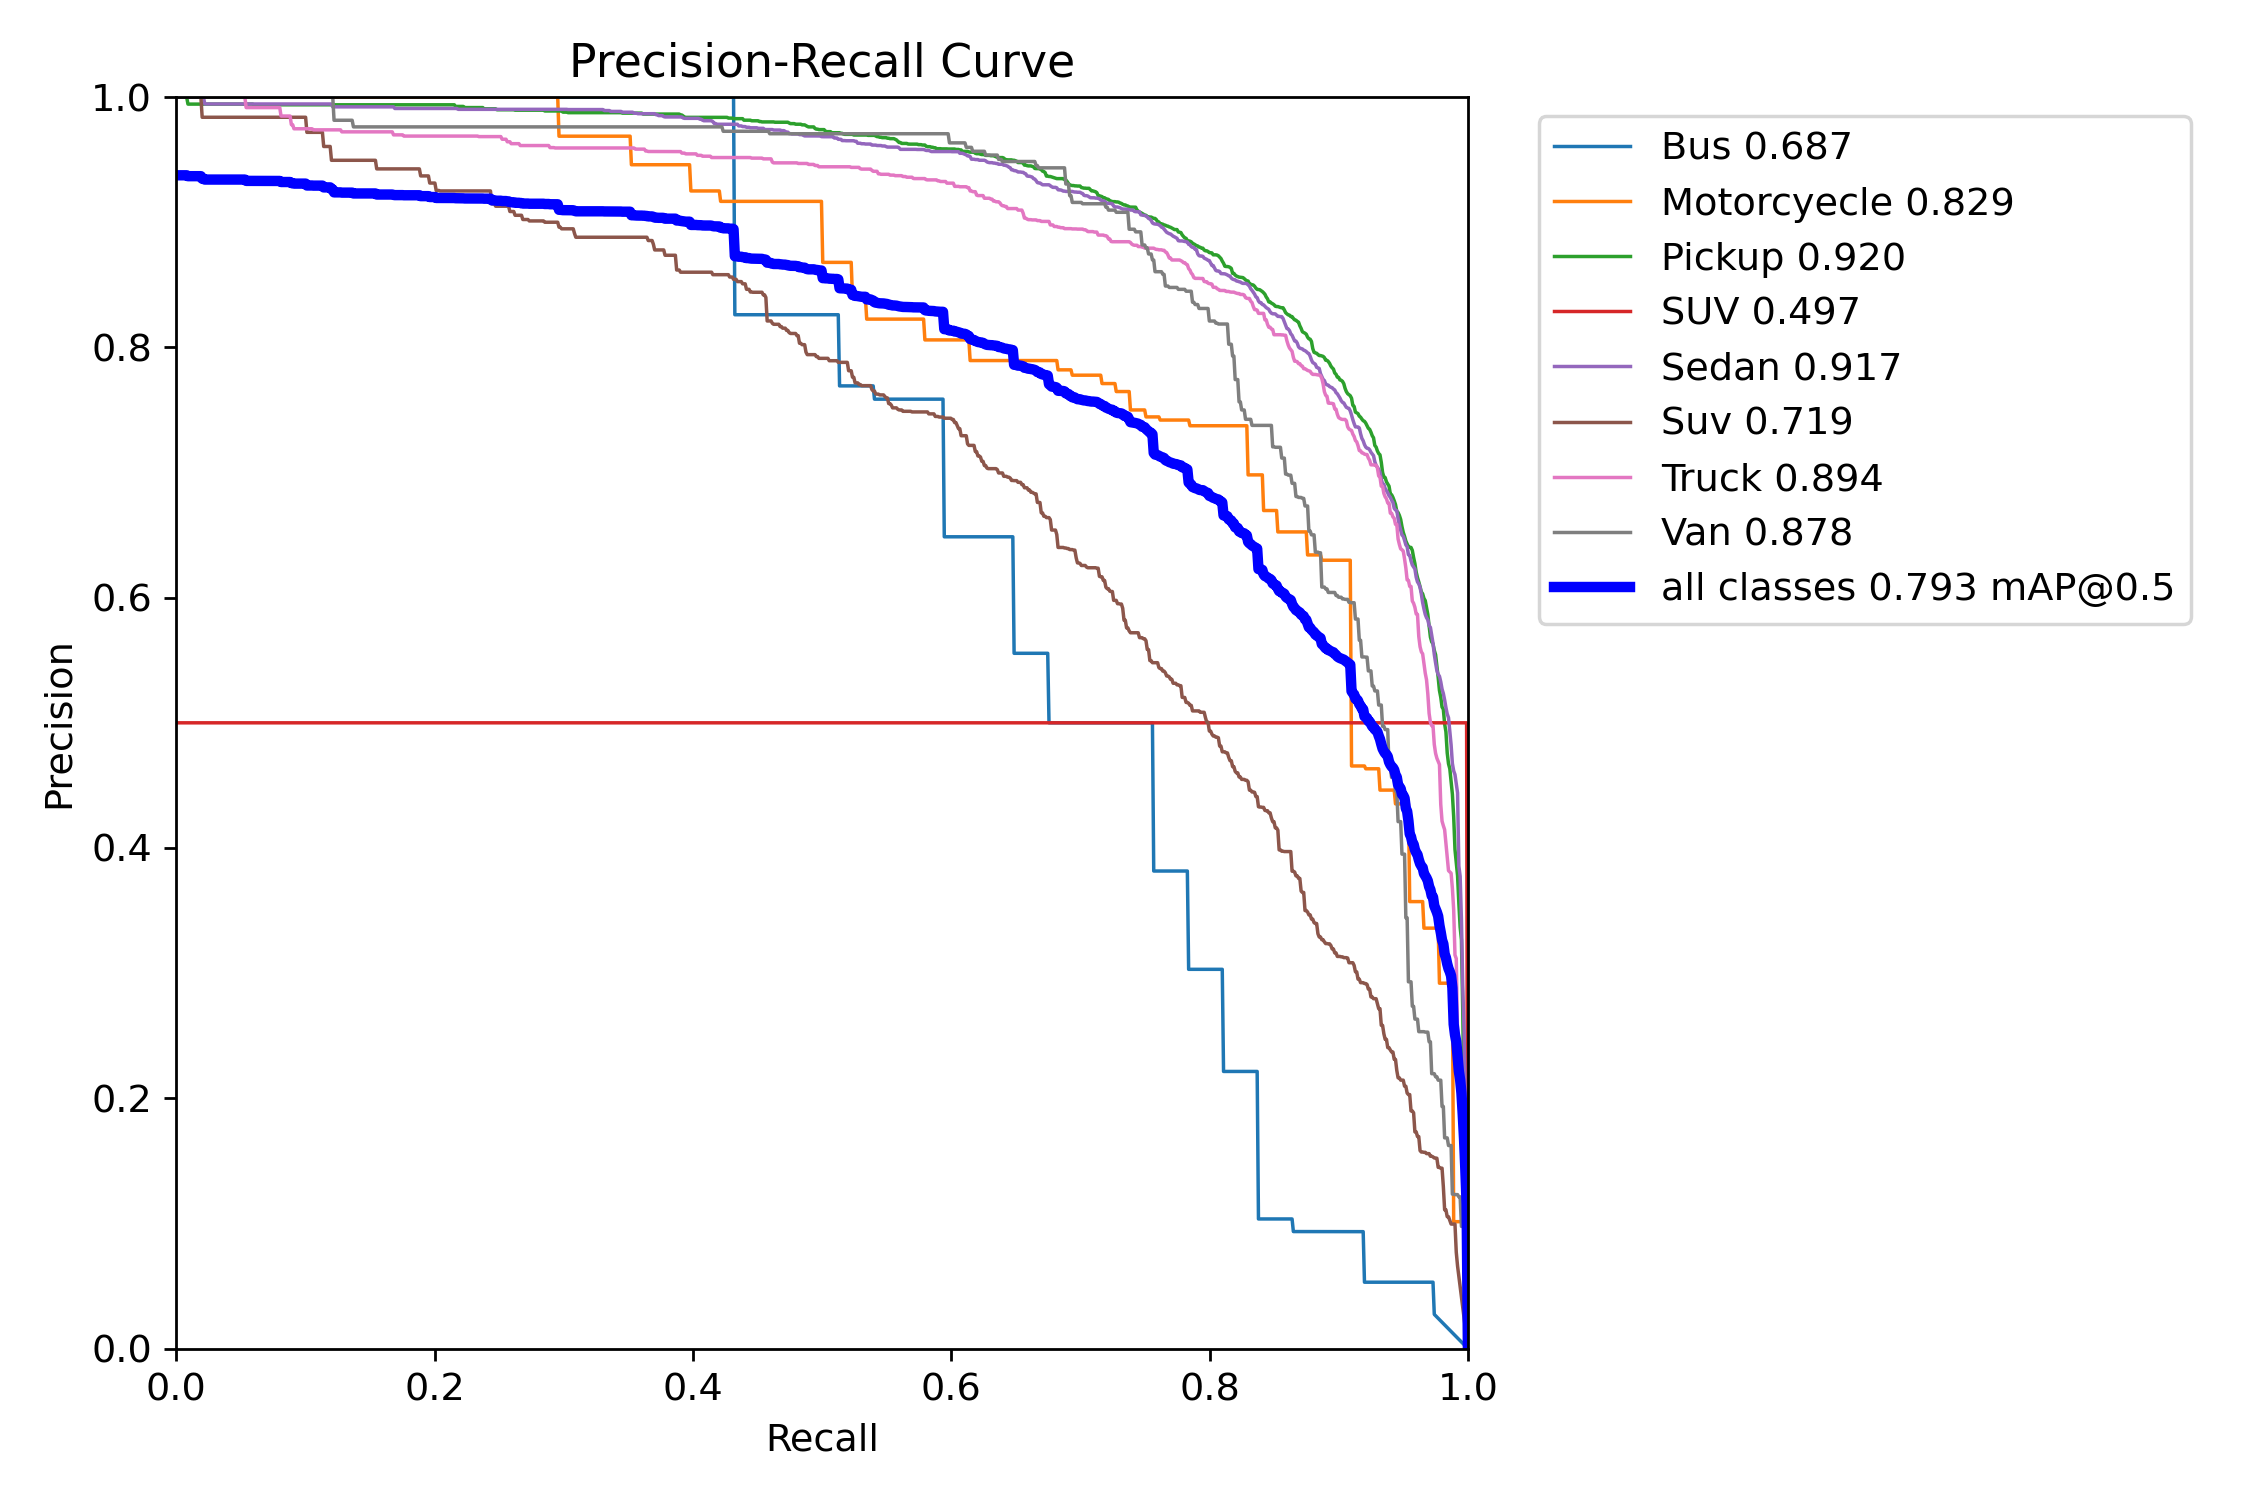

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

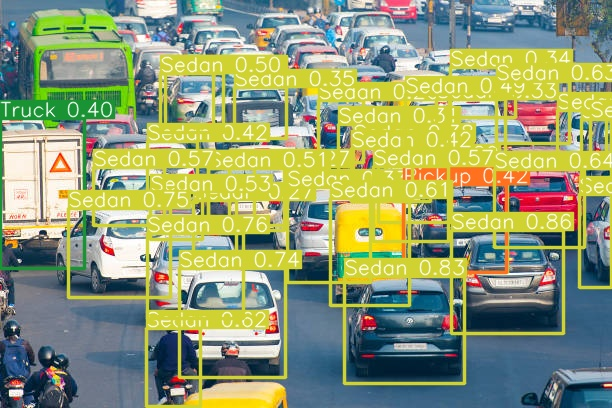

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

**For Testing on the random google images just upload the image on colab environment and replace the image name in the below code snippet with image.jpeg**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/image.jpeg save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/image.jpeg: 800x800 2 Pickups, 2 Sedans, 2 Trucks, 25.0ms
Speed: 9.7ms preprocess, 25.0ms inference, 807.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


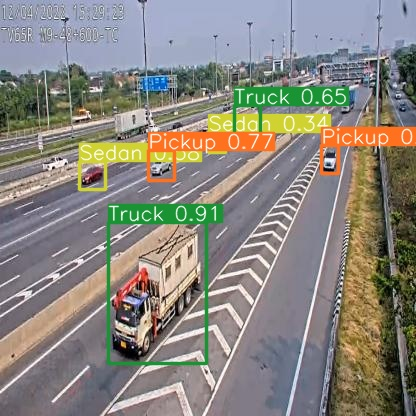

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/image.jpeg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images/ save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/291 /content/datasets/Car-Counting-1/test/images/-freemake_com-LOGO--DOH_14_mp4-14_jpg.rf.915b022b36d18d04ae2371ba2ef02727.jpg: 800x800 7 Pickups, 6 Sedans, 1 Suv, 3 Trucks, 22.5ms
image 2/291 /content/datasets/Car-Counting-1/test/images/-freemake_com-LOGO--DOH_14_mp4-3_jpg.rf.4f20134248e332c85695961bb093ca0f.jpg: 800x800 7 Pickups, 2 Sedans, 3 Trucks, 2 Vans, 22.5ms
image 3/291 /content/datasets/Car-Counting-1/test/images/113_jpg.rf.382b41681f9f5e6ce6c21876466c87cc.jpg: 800x800 2 Pickups, 22.5ms
image 4/291 /content/datasets/Car-Counting-1/test/images/190_jpg.rf.a836f47fc26f7be5eba543ea7df3ea90.jpg: 800x800 2 Pickups, 1 Sedan, 22.4ms
image 5/291 /content/datasets/Car-Counting-1/test/images/211---Copy_jpg.rf.36b9cd440d42f8b164198bced5766a7d.jpg: 800x800 2 Sedan

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/291 /content/datasets/Car-Counting-1/test/images/-freemake_com-LOGO--DOH_14_mp4-14_jpg.rf.915b022b36d18d04ae2371ba2ef02727.jpg: 800x800 6 Pickups, 9 Sedans, 4 Trucks, 22.6ms
image 2/291 /content/datasets/Car-Counting-1/test/images/-freemake_com-LOGO--DOH_14_mp4-3_jpg.rf.4f20134248e332c85695961bb093ca0f.jpg: 800x800 1 Bus, 6 Pickups, 4 Sedans, 3 Trucks, 2 Vans, 22.6ms
image 3/291 /content/datasets/Car-Counting-1/test/images/113_jpg.rf.382b41681f9f5e6ce6c21876466c87cc.jpg: 800x800 3 Pickups, 2 Sedans, 22.5ms
image 4/291 /content/datasets/Car-Counting-1/test/images/190_jpg.rf.a836f47fc26f7be5eba543ea7df3ea90.jpg: 800x800 2 Pickups, 1 Sedan, 22.5ms
image 5/291 /content/datasets/Car-Counting-1/test/images/211---Copy_jpg.rf.36b9cd440d42f8b164198bced5766a7d.jpg: 800x800 4 Sedans, 22.5ms
image 6/291 /content/d

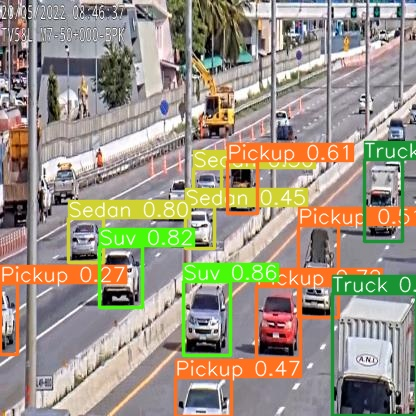

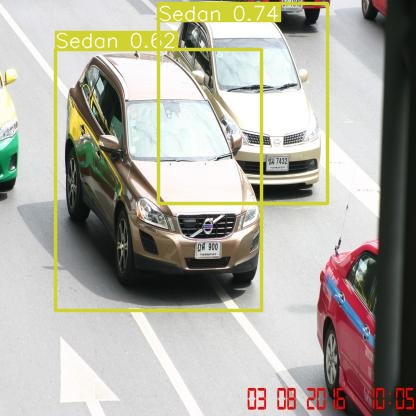

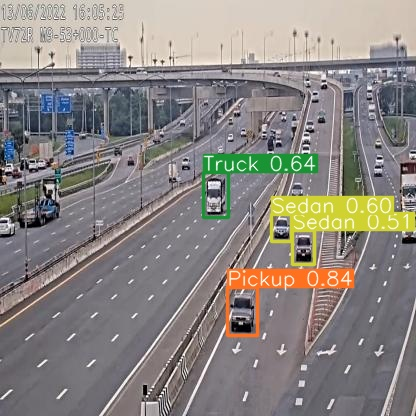

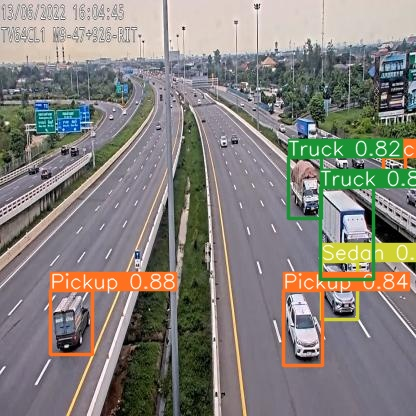

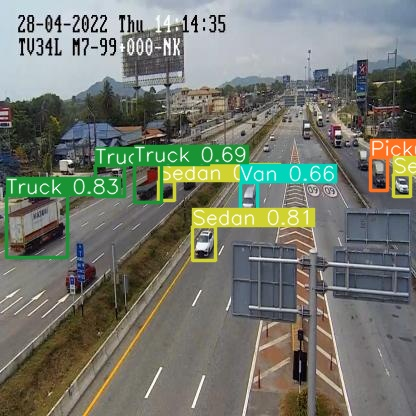

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

**Using below code we can zipped and then download the weights of the model and then we can test it on any other notebook.(We are also providing the another notebook for testing on github)**

In [ ]:
!zip -r weights.zip runs/detect/train/weights/

  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
